 # Annealing NP problems
 
 In this notebook we take a look at an NP-complete problem and its solution with various annealing mechanisms.

## Vertex Coloring

Let us look at the problem of graph coloring.

TODO: add description of the problem.

In [11]:
import networkx as nx
import numpy as np
from itertools import product
import dimod
import neal

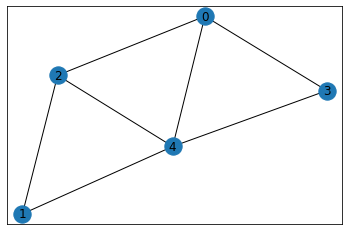

In [2]:
node_count = 5
edge_prob = 0.7

graph = nx.generators.random_graphs.erdos_renyi_graph(node_count, edge_prob)
nx.draw_networkx(graph)

In [13]:
color_count = 3
var_count = node_count * color_count

q = np.arange(var_count).reshape(node_count, color_count)
h = -1 * np.ones(var_count)
J = np.zeros((var_count, var_count))

for (u, v) in graph.edges:
    for (i, j) in product(range(color_count), repeat=2):
        if i != j:
            J[q[i, j], ]

for v in graph.nodes:
    for i,j in product(range(color_count), repeat=2):
        if i != j:
            J[q[v, i], q[v, j]] = 1
            
for (u, v) in graph.edges:
    for i in range(color_count):
        J[q[u, i], q[v, i]] += 1
        
bqm = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.BINARY)
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=100)

In [26]:
result = list(sampleset.lowest().first.sample.values())
colors = []
for v in graph.nodes():
    color = result[color_count * v:color_count * v + color_count]
    color = int('0b' + ''.join(map(str, color)), 2)
    colors.append(color)

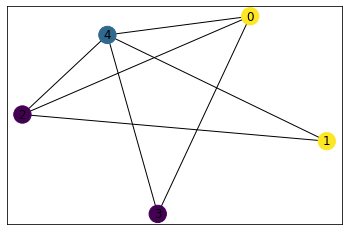

In [30]:
nx.draw_networkx(graph, node_color=colors)